The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

safety_checker/config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

(…)kpoints/scheduler_config-checkpoint.json:   0%|          | 0.00/209 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Image saved as 'generated_Class_B_easy.png'


  0%|          | 0/50 [00:00<?, ?it/s]

Image saved as 'generated_Class_B_hard.png'


  0%|          | 0/50 [00:00<?, ?it/s]

Image saved as 'generated_Class_A_easy.png'


  0%|          | 0/50 [00:00<?, ?it/s]

Image saved as 'generated_Class_A_hard.png'


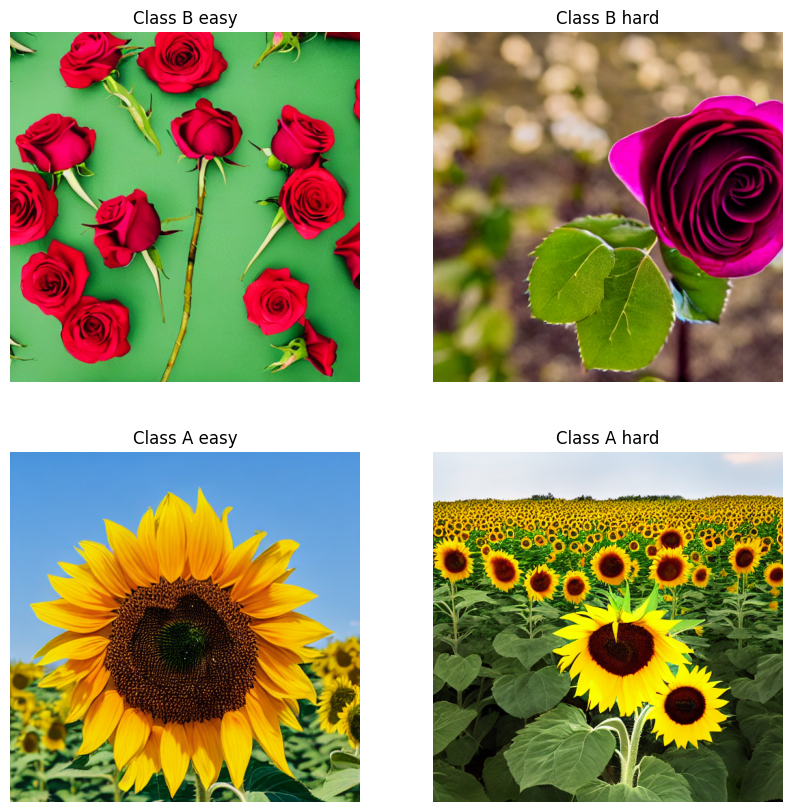

In [ ]:
from diffusers import StableDiffusionPipeline
import torch
import matplotlib.pyplot as plt

# Initialize the Stable Diffusion pipeline
model_id = "CompVis/stable-diffusion-v1-4"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16).to("cuda")

# Define prompts for Class A and Class B, with easy and hard versions
prompts = {
     "Class_B_easy": "A fully bloomed rose with vibrant red petals and a green stem, placed against a plain white background.",
    "Class_B_hard": "A rose with partially visible petals in the shadows, surrounded by leaves and other flowers, with a blurred background.",
    "Class_A_easy": "A bright, fully bloomed sunflower with yellow petals and a brown center, in a sunny field with a blue sky background.",
    "Class_A_hard": "A sunflower in a field, partially hidden behind other flowers, with some petals shadowed and the background blurred.",

}

# Generate and save images for each prompt
images = {}
for label, prompt in prompts.items():
    image = pipe(prompt).images[0]
    image.save(f"generated_{label}.png")
    images[label] = image
    print(f"Image saved as 'generated_{label}.png'")

# Display all generated images with their labels
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
for ax, (label, image) in zip(axs.flat, images.items()):
    ax.imshow(image)
    ax.axis("off")
    ax.set_title(label.replace("_", " "))

plt.show()